### 75.06/95.58 Organización de Datos: Trabajo Práctico 1 ###
#### Primer Cuatrimestre de 2020 ####



In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

tweets = pd.read_csv('train.csv') 
tweets.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [296]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [297]:
tweets['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

In [298]:
tweets['location'].describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [299]:
tweets['keyword'].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [300]:
duplicados = tweets.duplicated(subset = 'text', keep = False)
duplicados.value_counts()

False    7434
True      179
dtype: int64

In [301]:
tweets.drop_duplicates(subset = 'text', keep = False, inplace = True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7434 non-null   int64 
 1   keyword   7378 non-null   object
 2   location  4982 non-null   object
 3   text      7434 non-null   object
 4   target    7434 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 348.5+ KB


# TOP 50 DESASTRES COMENTADOS EN LOS TWEETS

In [302]:
desastres = tweets.groupby("keyword").agg({"target":["count","mean"]}).copy()
level0 = desastres.columns.get_level_values(0)
level1 = desastres.columns.get_level_values(1)
desastres.columns = level0 + "_" + level1
desastres.sort_values(by="target_count",ascending = False,inplace = True)
desastres = desastres.head(50) #TOP 50

[]

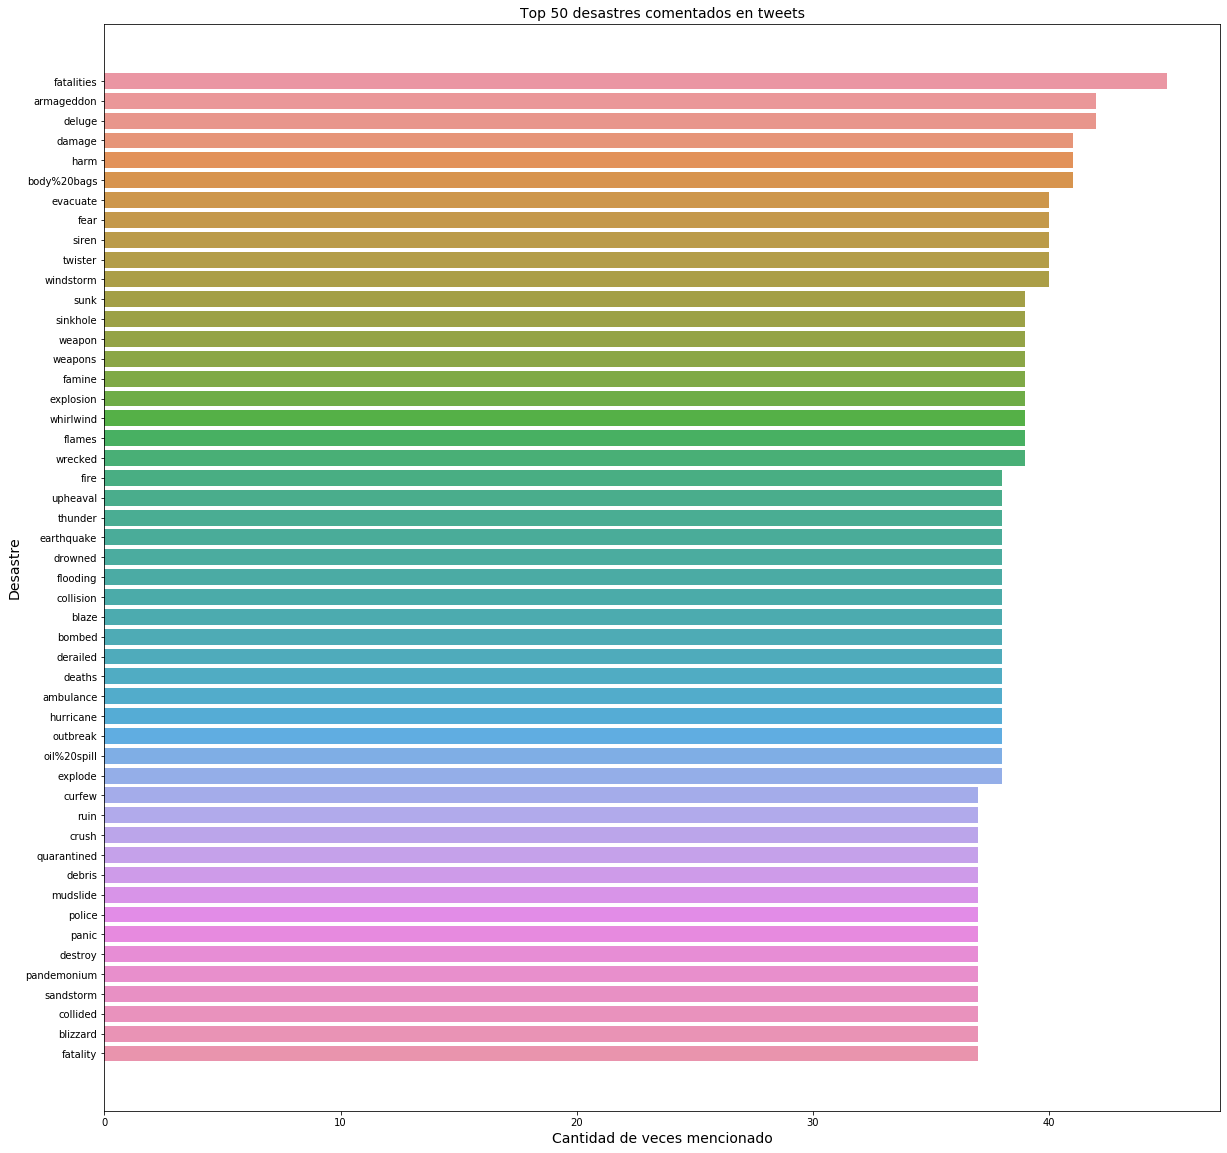

In [303]:
fig = plt.figure(figsize=(20,20))
grafico = sns.barplot(data = desastres,x = "target_count",y = desastres.index)
grafico.set_title("Top 50 desastres comentados en tweets",fontsize = 14)
grafico.set_xlabel("Cantidad de veces mencionado",fontsize = 14)
grafico.set_ylabel("Desastre",fontsize = 14)
grafico.plot()

# HASHTAGS MAS USADOS

In [304]:
#
tweets['hashtags'] = tweets['text'].str.findall(r'#.\S*?(?=\s|[:]|$)')
tweets_hashtags = tweets.explode('hashtags')
tweets_hashtags.drop(['id', 'keyword', 'text'], axis = 1, inplace = True)
tweets_hashtags['hashtags'] = tweets_hashtags['hashtags'].str.lower()
tweets_hashtags.sample(25)


,location,target,hashtags
5664,Wanderlust,0,NaN
4851,"California, USA",1,#theatershooting
6505,NaN,0,#investing
766,NaN,0,NaN
915,Isolated City In World Perth,1,NaN
7442,Earth,0,#jonathanferrell
4342,NaN,0,NaN
5564,vancouver usa,0,NaN
4363,NaN,1,NaN
3071,#otrakansascity,0,NaN


In [305]:
hashtags = tweets_hashtags.groupby('hashtags').agg({'target':['count','mean']})
#tweets_hashtags['hashtag_count'] = tweets_hashtags.groupby('hashtag')['target'].transform('count')
hashtags.sort_values(by=("target","count"),ascending = False,inplace = True)
#tweets_hashtags.sort_values(by='hashtag_count',ascending = False,inplace = True)
hashtags[("target","mean")] = (hashtags[("target","mean")]*100).round()
hashtags = hashtags.head(50).reset_index()

hashtags.head(25)

hashtags target       
                   count   mean
0           #news     74   73.0
1            #hot     30   43.0
2           #best     30   43.0
3       #prebreak     30   43.0
4            #???     23  100.0
5     #nowplaying     23    9.0
6      #hiroshima     21  100.0
7             #??     20   95.0
8           #gbbo     18   22.0
9     #earthquake     17  100.0
10          #jobs     14    0.0
11          #isis     12   75.0
12     #terrorism     11   73.0
13         #japan     11  100.0
14           #job     11    0.0
15         #world     11   82.0
16         #sismo     10   90.0
17         #india     10  100.0
18       #abstorm      9  100.0
19            #rt      9   22.0
20       #nuclear      9   78.0
21           #bbc      9   67.0
22  #directioners      9   11.0
23     #worldnews      9  100.0
24           #yyc      9  100.0

/home/agustin/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/agustin/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


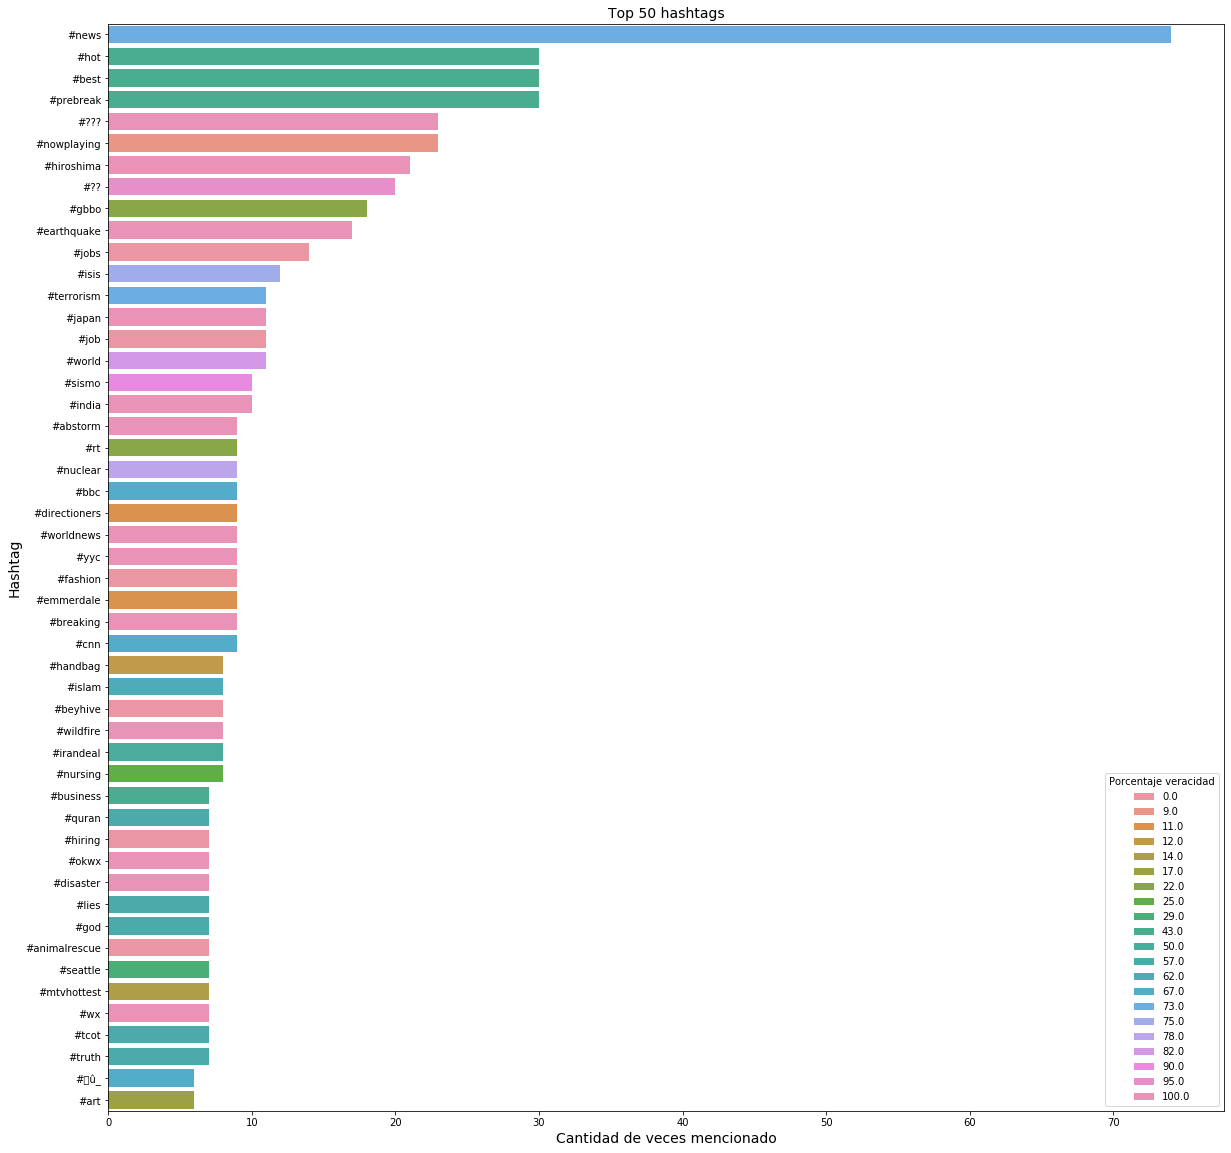

In [306]:
fig = plt.figure(figsize = (20, 20))
palette = sns.dark_palette("muted purple", input="xkcd")
grafico = sns.barplot(data = hashtags, x = ("target","count"), y = 'hashtags', hue = ('target','mean'), dodge = False)#, hue = ('target','mean'), palette = palette, dodge = False
grafico.set_title("Top 50 hashtags", fontsize = 14)
grafico.set_xlabel("Cantidad de veces mencionado", fontsize = 14)
grafico.set_ylabel("Hashtag", fontsize = 14)
plt.legend(title='Porcentaje veracidad', loc='lower right')
plt.show(grafico)

# Trending topics de las ciudades mas "desastrosas"

In [307]:
#Falta filtrar por target
#ASK MILE FOR HER TOP LOCATIONS (TT en las ciudades mas desastrosas)
tweets_hashtags.dropna(subset = ['location', 'hashtags'], inplace= True)
tweets_hashtags = tweets_hashtags[(tweets.target == 1)]
locations = tweets_hashtags.groupby('location').agg({'location':'count', 'hashtags': 'max'})#.size().nlargest(50)
locations = locations.rename(columns = {'location': 'count'})
locations = locations.reset_index()
locations.sort_values(by= 'count', inplace= True, ascending = False)
locations = locations.head(50)
locations.head(5)

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,location,count,hashtags
355,USA,49,#worldnews
360,United States,14,#wxky
353,UK,14,#ukfloods
291,Rocky Mountains,13,#yazidis
372,Washington DC,13,#whitehouse


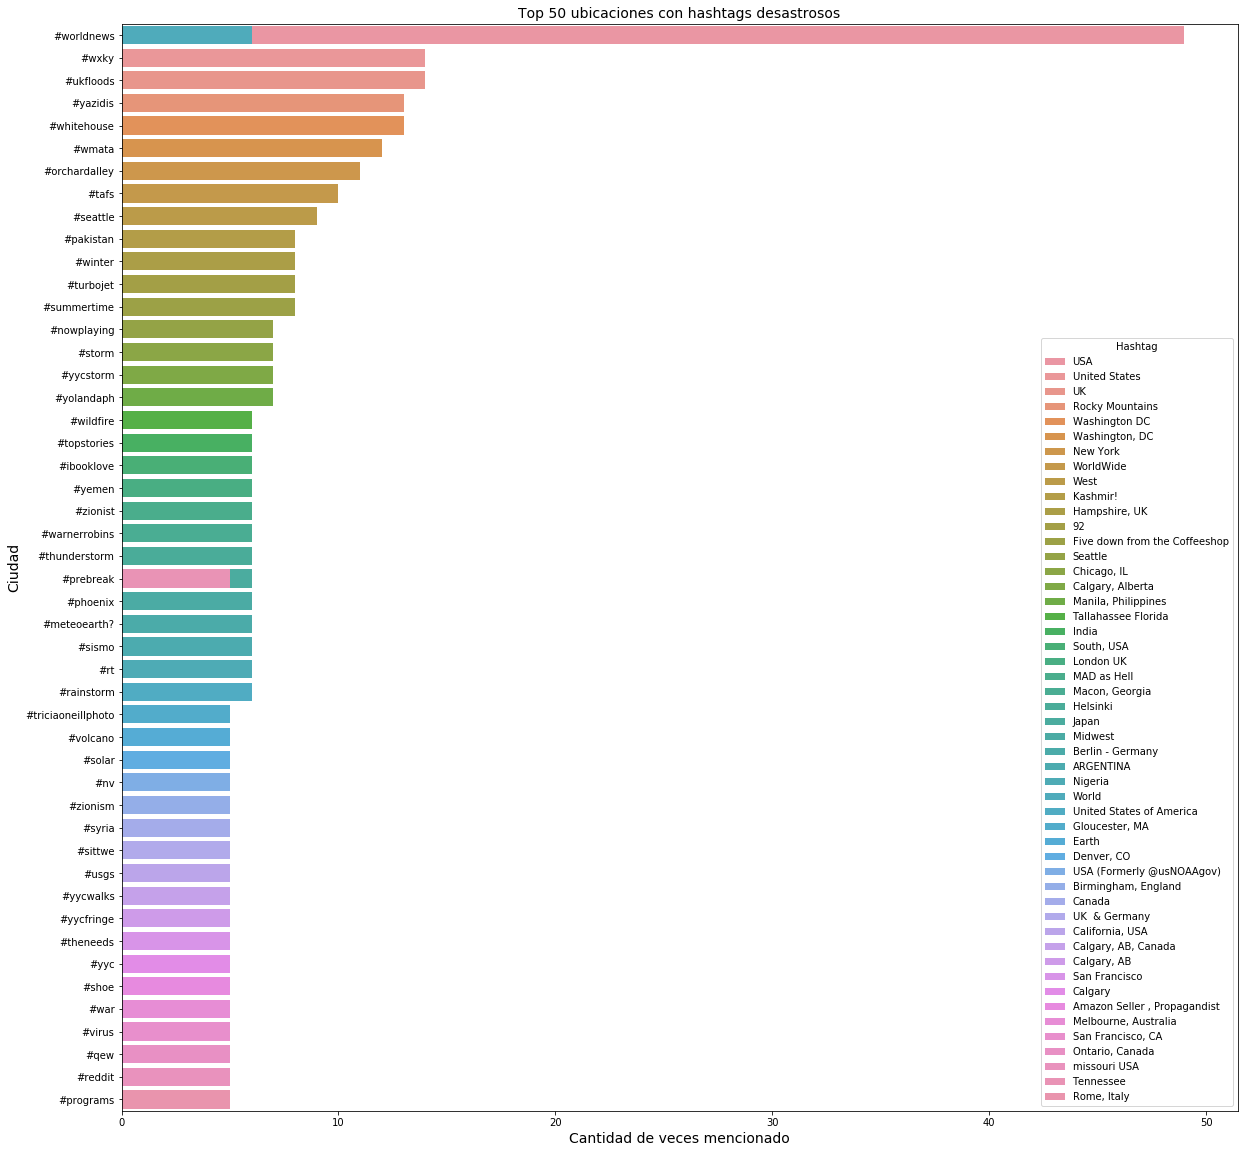

In [308]:
fig = plt.figure(figsize = (20, 20))
#palette = sns.dark_palette("muted purple", input="xkcd")
grafico = sns.barplot(data = locations, x = 'count', y = 'hashtags', hue = 'location', dodge = False)#, hue = ('target','mean'), palette = palette, dodge = False
grafico.set_title("Hashtags mas usados en las top 50 ubicaciones del mundo", fontsize = 14)
grafico.set_xlabel("Cantidad de veces mencionado", fontsize = 14)
grafico.set_ylabel("Hashtag", fontsize = 14)
plt.legend(title='Ubicacion', loc='lower right')
plt.show(grafico)

In [309]:
tweets['target_mean'] = tweets.groupby('keyword')['target'].transform('mean')
tweets['keyword_count'] = tweets.groupby('keyword')['keyword'].transform('count')

tweets.sort_values(by='target_mean', ascending=False, inplace = True)
tweets = tweets.head(200)
tweets.head(20)

,id,keyword,location,text,target,hashtags,target_mean,keyword_count
2446,3512,derailment,NaN,#ModiMinistry Madhya Pradesh Train Derailment:...,1,[#ModiMinistry],1.0,31.0
2467,3535,derailment,NaN,http://t.co/BAGEF9lFGT 25 killed 50 injured in...,1,[],1.0,31.0
2173,3116,debris,NaN,RÌ©union Debris Is Almost Surely From Flight 3...,1,[],1.0,37.0
2172,3115,debris,NaN,RÌ©union Debris Is Almost Surely From Flight 3...,1,[],1.0,37.0
2171,3114,debris,"46.950109,7.439469",How Missing JetÛªs Debris Could Have Floated ...,1,[],1.0,37.0
2170,3112,debris,NaN,#?? #???? #??? #??? MH370: Aircraft debris fou...,1,"[#??, #????, #???, #???]",1.0,37.0
2169,3111,debris,Nigeria,Malaysia confirms plane debris washed up on Re...,1,[],1.0,37.0
2168,3109,debris,NaN,#?? #?? #??? #??? MH370: Aircraft debris found...,1,"[#??, #??, #???, #???]",1.0,37.0
2167,3108,debris,NaN,Confirmed the debris from MH370 ??,1,[],1.0,37.0
2166,3107,debris,772 Temperance Permenence,Discovered Plane Debris Is From Missing Malays...,1,[],1.0,37.0


In [310]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="que_te_importa")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
locations['location'] = locations['location'].apply(geocode)
locations

,location,count,hashtags
355,"(United States, (39.7837304, -100.4458825))",49,#worldnews
360,"(United States, (39.7837304, -100.4458825))",14,#wxky
353,"(United Kingdom, (54.7023545, -3.2765753))",14,#ukfloods
291,"(Rocky Mountains, Teton County, Wyoming, Unite...",13,#yazidis
372,"(Washington, District of Columbia, 20500, Unit...",13,#whitehouse
374,"(Washington, District of Columbia, 20500, Unit...",12,#wmata
241,"(New York, United States of America, (40.71272...",11,#orchardalley
387,"(Worldwide, Crescent Road, Crumpsall, Manchest...",10,#tafs
377,"(Western, West Kenya, Kenya, (0.5090396, 34.57...",9,#seattle
182,"(کشمیر, Baltistān District, گلگت بلتستان, پاکس...",8,#pakistan


In [311]:
from shapely.geometry import Point

locations['point'] = locations['location'].apply(lambda loc: (loc.longitude, loc.latitude) if loc else None)
locations = locations.replace(to_replace='None', value=np.nan).dropna()
locations['point'] = locations['point'].apply(Point)

locations

,location,count,hashtags,point
355,"(United States, (39.7837304, -100.4458825))",49,#worldnews,POINT (-100.4458825 39.7837304)
360,"(United States, (39.7837304, -100.4458825))",14,#wxky,POINT (-100.4458825 39.7837304)
353,"(United Kingdom, (54.7023545, -3.2765753))",14,#ukfloods,POINT (-3.2765753 54.7023545)
291,"(Rocky Mountains, Teton County, Wyoming, Unite...",13,#yazidis,POINT (-110.9175065 43.3578532)
372,"(Washington, District of Columbia, 20500, Unit...",13,#whitehouse,POINT (-77.03657080000001 38.8949855)
374,"(Washington, District of Columbia, 20500, Unit...",12,#wmata,POINT (-77.03657080000001 38.8949855)
241,"(New York, United States of America, (40.71272...",11,#orchardalley,POINT (-74.00601519999999 40.7127281)
387,"(Worldwide, Crescent Road, Crumpsall, Manchest...",10,#tafs,POINT (-2.2434612 53.5120412)
377,"(Western, West Kenya, Kenya, (0.5090396, 34.57...",9,#seattle,POINT (34.5731341 0.5090396)
182,"(کشمیر, Baltistān District, گلگت بلتستان, پاکس...",8,#pakistan,POINT (75.39310005390217 34.9271029)


[]

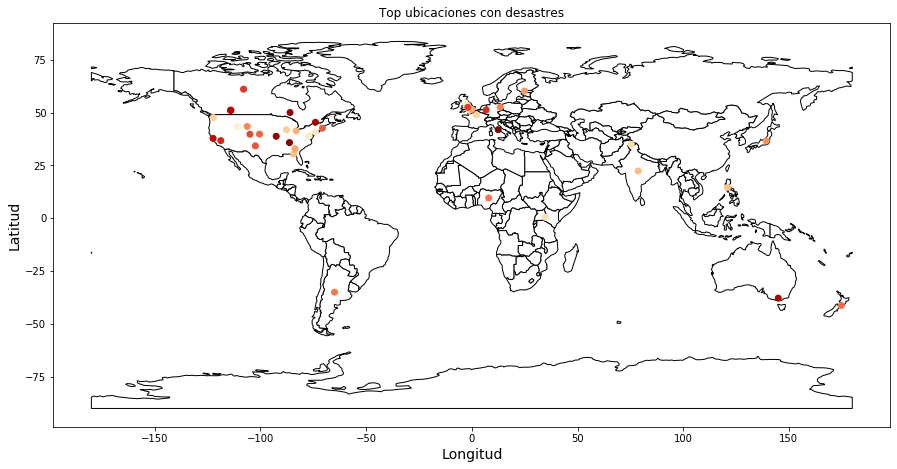

In [312]:
import geopandas as gpd

locations['point'].apply(Point)
mapa = gpd.GeoDataFrame(locations, geometry='point')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white',edgecolor='black', figsize = (15, 20))

grafico = mapa.plot(ax=ax, cmap='OrRd', legend=True)
grafico.axes.set_title('Top ubicaciones con desastres')
grafico.set_xlabel("Longitud", fontsize = 14)
grafico.set_ylabel("Latitud", fontsize = 14)
grafico.plot()

In [313]:
'''
ts['location'] = tweets['location'].str.split(", -")
tweets['text_contains_location'] = tweets[tweets['text'].str.contains
tweets.sample(50)
validLocations["location"].str.lower().str.split(",").map(lambda x: x[0])
'''

'\nts[\'location\'] = tweets[\'location\'].str.split(", -")\ntweets[\'text_contains_location\'] = tweets[tweets[\'text\'].str.contains\ntweets.sample(50)\nvalidLocations["location"].str.lower().str.split(",").map(lambda x: x[0])\n'